## Create Visualization With Pumkin Dataset 

In [12]:
# importing necessary 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [20]:
# Set style for better visuals
plt.style.use('default')
sns.set_style("whitegrid")

In [ ]:
# installation of openpyxl
!pip install openpyxl

In [18]:
# loading the dataset
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [ ]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

In [ ]:
# Check for missing values and basic stats
print("Basic statistics:")
print(df.describe())

In [ ]:
# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())


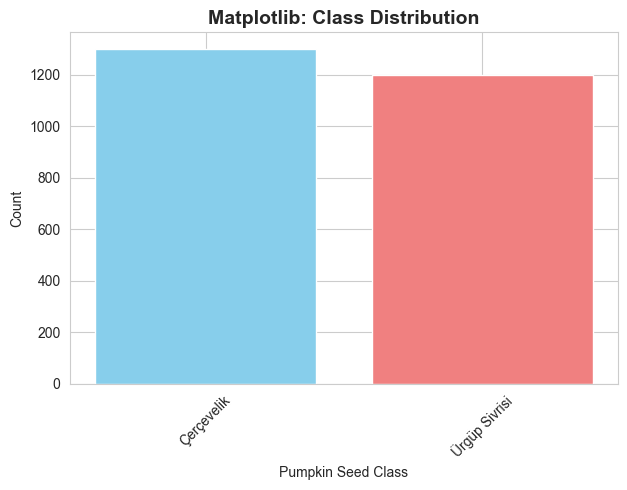

In [40]:
# Matplotlib version
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_counts = df['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Matplotlib: Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Pumpkin Seed Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Numeric features: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness']


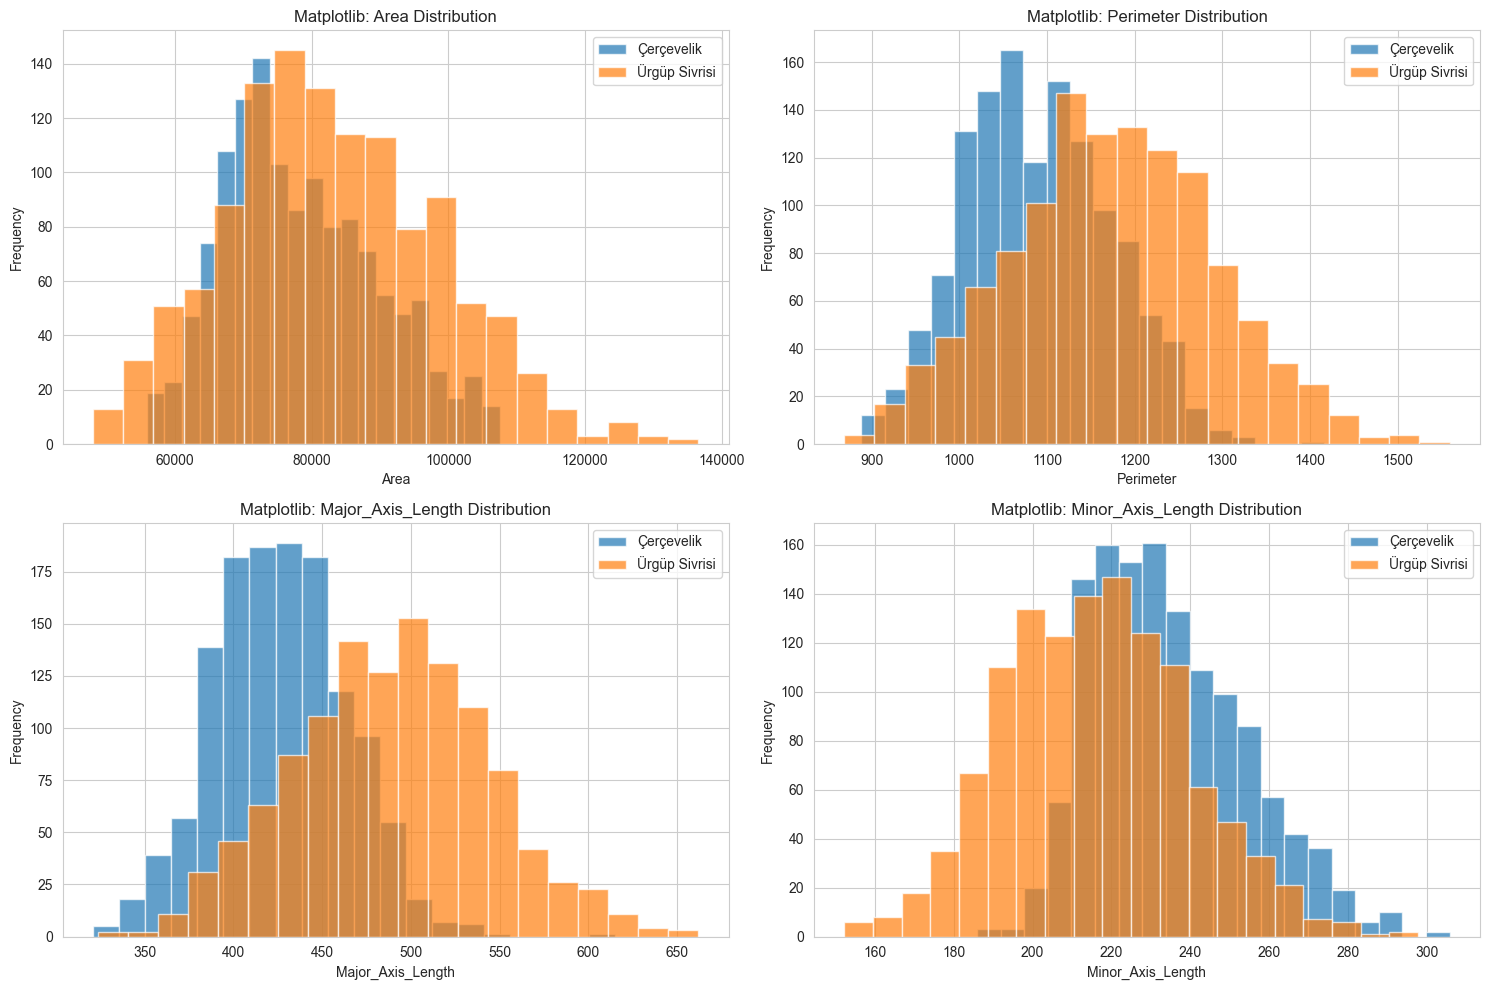

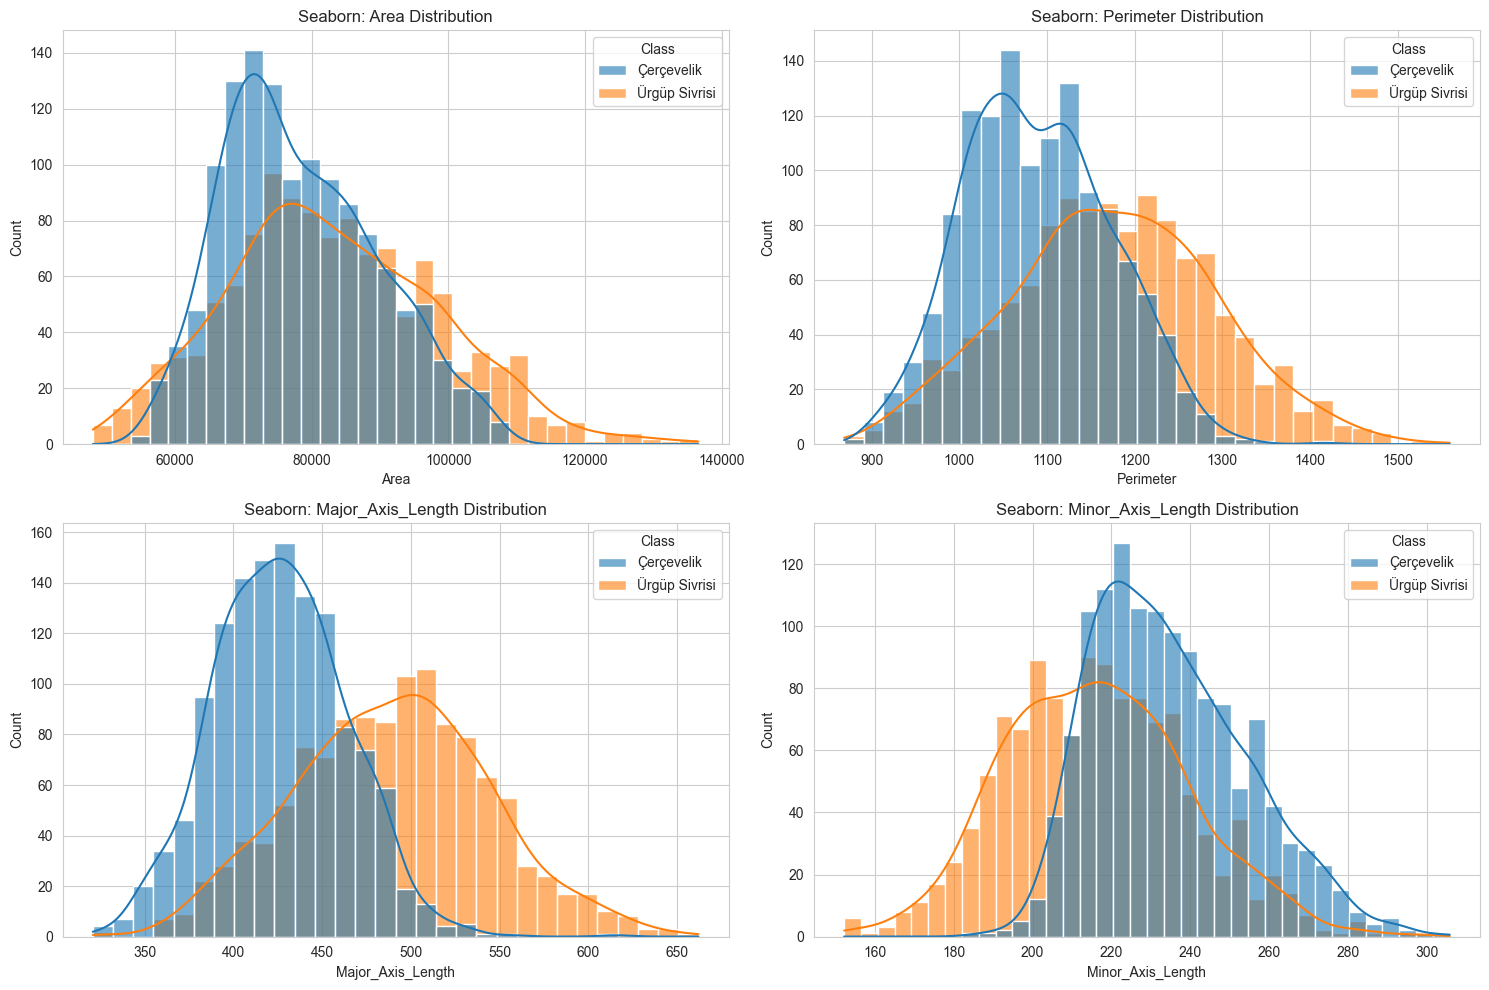

In [51]:
# Select numeric features for visualization
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col != 'Class_encoded']

print("Numeric features:", numeric_features)

# Matplotlib version - Boxplot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features[:4], 1):
    plt.subplot(2, 2, i)
    for class_type in df['Class'].unique():
        class_data = df[df['Class'] == class_type][feature]
        plt.hist(class_data, alpha=0.7, label=class_type, bins=20)
    plt.title(f'Matplotlib: {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Seaborn version - Boxplot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, hue='Class', kde=True, alpha=0.6)
    plt.title(f'Seaborn: {feature} Distribution')

plt.tight_layout()
plt.show()

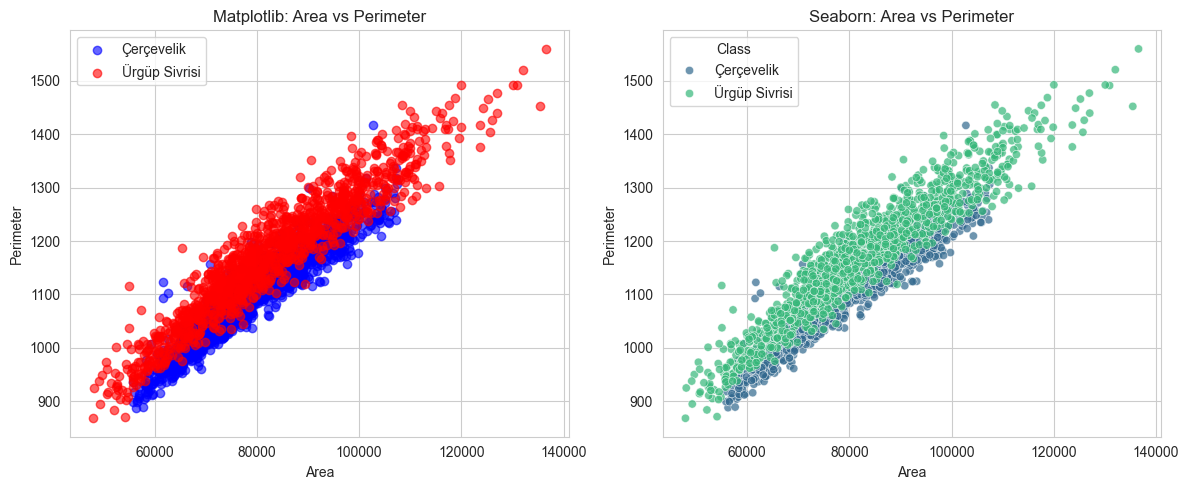

In [52]:
# Select two features for scatter plot
feature1, feature2 = numeric_features[0], numeric_features[1]

plt.figure(figsize=(12, 5))

# Matplotlib version
plt.subplot(1, 2, 1)
colors = {'Çerçevelik': 'blue', 'Ürgüp Sivrisi': 'red'}
for class_type, color in colors.items():
    class_data = df[df['Class'] == class_type]
    plt.scatter(class_data[feature1], class_data[feature2], 
               alpha=0.6, label=class_type, color=color)
plt.title(f'Matplotlib: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()

# Seaborn version
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=feature1, y=feature2, hue='Class', 
               palette='viridis', alpha=0.7)
plt.title(f'Seaborn: {feature1} vs {feature2}')

plt.tight_layout()
plt.show()